# Отток. 

Датасет об оттоке абонентов в телекоме. 

Целевая переменная – churn (индикатор оттока).

Нужно построить модель, предсказывающую отток, оценить качество этой модели.

## 1) Библиотеки и данные

In [161]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')
import pydotplus
from IPython.display import Image
from six import StringIO 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

import os

In [3]:
churn = pd.read_csv('/work/churn.csv')

In [4]:
churn = churn[['age', 'annualincome', 'calldroprate', 'callfailurerate',
       'customerid', 'customersuspended', 'education',
       'gender', 'homeowner', 'maritalstatus', 'monthlybilledamount',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation',
       'penaltytoswitch', 'state', 'totalminsusedinlastmonth',
       'unpaidbalance', 'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration',
       'avgcallduration', 'churn']]

## 2) Знакомимся и подготавливаем данные.

In [5]:
churn.head(5)

,age,annualincome,calldroprate,callfailurerate,customerid,customersuspended,education,gender,homeowner,maritalstatus,...,penaltytoswitch,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn
0,12,168147,0.06,0.00,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,371,WA,15,19,No,No,0.82,5971,663,0
1,12,168147,0.06,0.00,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,371,WA,15,19,No,No,0.82,3981,995,0
2,42,29047,0.05,0.01,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,43,WI,212,34,No,Yes,0.27,7379,737,0
3,42,29047,0.05,0.01,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,43,WI,212,34,No,Yes,0.27,1729,432,0
4,58,27076,0.07,0.02,3,Yes,Master or equivalent,Female,Yes,Single,...,403,KS,216,144,No,No,0.48,3122,624,0


Поскольку датасет был взят на просторах интернета нужно разобраться о чём переменные. Let's start! :) 

In [6]:
churn.columns.values

array(['age', 'annualincome', 'calldroprate', 'callfailurerate',
       'customerid', 'customersuspended', 'education', 'gender',
       'homeowner', 'maritalstatus', 'monthlybilledamount',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation',
       'penaltytoswitch', 'state', 'totalminsusedinlastmonth',
       'unpaidbalance', 'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration',
       'avgcallduration', 'churn'], dtype=object)

- 'age' - логично, что это возраст

- 

- 'customerid' - идентификатор клиента

- 'customersuspended' - приостановленный клиент

- 

- 

- 'homeowner' - домовладелец

- 'maritalstatus' - семейное положение

- 

- 

- 

- 

- 

- 'usesvoiceservice' - использование голосовых услуг

- 'percentagecalloutsidenetwork' -процент звонков вне сети 

- 'totalcallduration' - общая продолжительность звонков

Теперь необходимо рассмотреть пропущенные значения.

In [7]:
# Проверим типы данных
churn.dtypes

age                                       int64
annualincome                              int64
calldroprate                            float64
callfailurerate                         float64
customerid                                int64
customersuspended                        object
education                                object
gender                                   object
homeowner                                object
maritalstatus                            object
monthlybilledamount                       int64
numberofcomplaints                        int64
numberofmonthunpaid                       int64
numdayscontractequipmentplanexpiring      int64
occupation                               object
penaltytoswitch                           int64
state                                    object
totalminsusedinlastmonth                  int64
unpaidbalance                             int64
usesinternetservice                      object
usesvoiceservice                        

In [8]:
# Преобразование percentagecalloutsidenetwork в числовой тип данных.
churn.percentagecalloutsidenetwork = pd.to_numeric(churn.percentagecalloutsidenetwork, errors='coerce')
churn.isnull().sum()

age                                     0
annualincome                            0
calldroprate                            0
callfailurerate                         0
customerid                              0
customersuspended                       0
education                               0
gender                                  0
homeowner                               0
maritalstatus                           0
monthlybilledamount                     0
numberofcomplaints                      0
numberofmonthunpaid                     0
numdayscontractequipmentplanexpiring    0
occupation                              0
penaltytoswitch                         0
state                                   0
totalminsusedinlastmonth                0
unpaidbalance                           0
usesinternetservice                     0
usesvoiceservice                        0
percentagecalloutsidenetwork            0
totalcallduration                       0
avgcallduration                   

Пропущенных нет, круто :)

In [9]:
# Удаляю айди пользователя
churn2 = churn.iloc[:,1:]

# Предиктор в бинарную 
churn2['churn'].replace(to_replace='Yes', value=1, inplace=True)
churn2['churn'].replace(to_replace='No',  value=0, inplace=True)

# Преобразую горячим кодированием
churn_dummies = pd.get_dummies(churn2)
churn_dummies.head()

,annualincome,calldroprate,callfailurerate,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,usesinternetservice_No,usesinternetservice_Yes,usesvoiceservice_No,usesvoiceservice_Yes
0,168147,0.06,0.00,1,71,0,7,96,371,15,...,0,0,1,0,0,0,1,0,1,0
1,168147,0.06,0.00,1,71,0,7,96,371,15,...,0,0,1,0,0,0,1,0,1,0
2,29047,0.05,0.01,2,8,1,4,14,43,212,...,0,0,0,1,0,0,1,0,0,1
3,29047,0.05,0.01,2,8,1,4,14,43,212,...,0,0,0,1,0,0,1,0,0,1
4,27076,0.07,0.02,3,16,0,2,55,403,216,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot: >

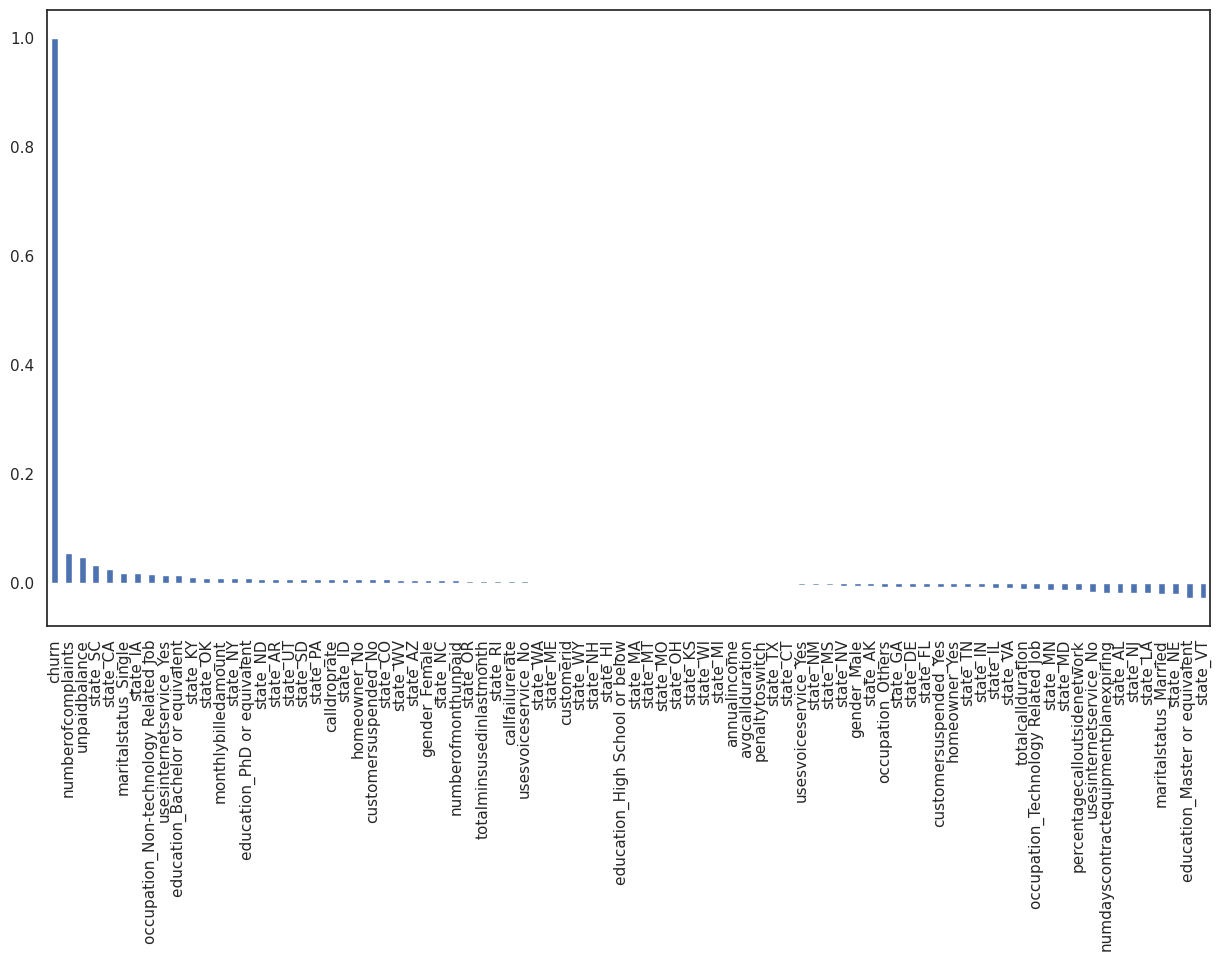

In [10]:
# Посмотрим на корреляцию "сhurn" с другими переменными:
plt.figure(figsize=(15,8))
churn_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Количество жалоб = 'numberofcomplaints', неоплаченный баланс = 'unpaidbalance', ежемесячная сумма счета = 'monthlybilledamount' положительно коррелируют с оттоком. В то время как дней до истечения контракта = 'numdayscontractequipmentplanexpiring' и другие конкретные переменные отрицательно коррелируют.

Интересно, что такие услуги, как использование интернета, степень образования бакалавр или PhD, некоторые определенные штаты, не отстраненный клиент отрицательно связаны с потоком. А степень образования -- магистр положительно. Касательно штатов -- возможно в каких-то штатах стоит наилучшее оборудование, поэтому связь там лучше и соответственно отток меньше. Также это может быть связано с любыми другими внешними причинами, от конкурентов, до цифровизации в том или ином населенном пункте. Также интересно то, что пол мужской или женский немного коррелируют и женский пол влияет отрицательно, а мужской наоборот -- положительно.

## 3) Исследование данных

Начну с изучения набора данных, чтобы лучше понять закономерности в данных и, возможно, сформировать некоторые гипотезы. Сначала мы рассмотрим распределение отдельных переменных, а затем нарежем наши данные на кусочки, чтобы выявить какие-либо интересные тенденции.

A) Демографические данные и прямые характеристики пользователя - 'gender' = пол, 'homeowner'= домовладелец, 'maritalstatus' = семейное положение, 'education' - образование, 'occupation' = профессия, какой штат. И конечно -- же возраст!

Пол пользователя.

In [33]:
group = churn['gender'].value_counts()
gtype = ['Женщина', 'Мужчина']

fig = px.bar(x = gtype, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Распределение по полу')

fig.update_layout( xaxis_title = "Пол", yaxis_title = "Количество")
fig.show()

Женщин чуть больше, но всё же перекос не такой сильный.

Домовладелец (да или нет).

In [34]:
homeowner = churn['homeowner'].value_counts()
fig = px.pie(values = homeowner.values, names = homeowner.index, 
            title = 'Домовладелец')
fig.show()

У нас есть лишь 20% домовладельцев. Значит большинство людей арендуют свое жилье.

Семейное положение

Узнаю какие значения там есть:

In [35]:
maritalstatus = churn['maritalstatus'].value_counts()
fig = px.pie(values = maritalstatus.values, names = maritalstatus.index, 
            title = 'Семейное положение')
fig.show()

Одиноких 51%, замужних(женатых) 49%. Перекоса нет.

Профессия.

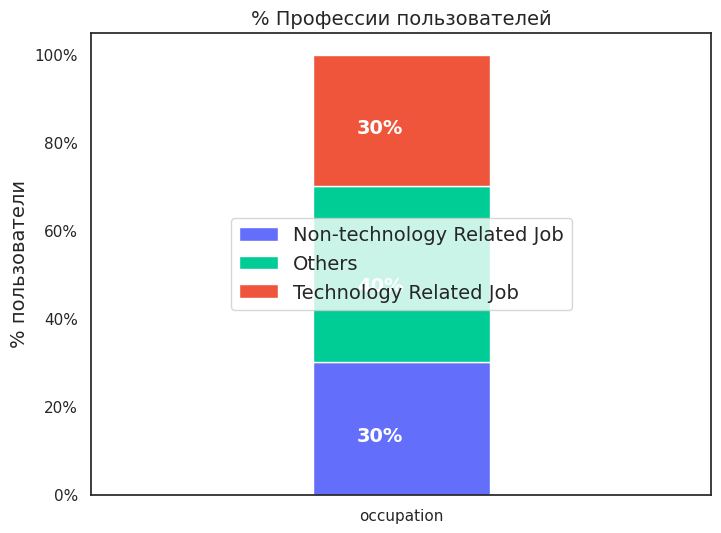

In [26]:
ch2 = pd.melt(churn, id_vars=['customerid'], value_vars=['occupation'])
ch3 = ch2.groupby(['variable','value']).count().unstack()
ch3 = ch3*100/len(churn)
colors = ['#636EFB','#00CC96', '#EF553B']
ax = ch3.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                    width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% пользователи',size = 14)
ax.set_xlabel('')
ax.set_title('% Профессии пользователей',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

30% пользователей работают в сфере технологий, 30% работают не в технологической сфере и 40% "другое". Немного странное распределение, не по цифрам, а скорее по названиям. Возможно часть людей входящих в эти 40% не работает, а учатся. Тут я ничего делать не буду, поскольку что закладывались создателями датасета при нейминге не известно. Возможно это супер-важно.

Образование.

In [38]:
education = churn['education'].value_counts()
fig = px.pie(values = education.values, names = education.index, 
            title = 'Образование')
fig.show()

Интересно то, что почти половина пользователей имеет только школьное образование. Соотношение ступеней высшего образования мне кажется логичным, потому что почти 30% людей имеет бакалаврскую ступень и далее по уменьшению. В целом распределение ступеней образование нормальное.

Возраст.

In [39]:
fig = px.box(y = churn['age'], title = 'возраст')
fig.show()

Согласно данному графику медианой возраст -- 45 лет. 25% наблюдений младше 28 лет и 25% пользователей старше62 лет. Выбросов нет. Максимальный возраст -- 79 лет, минимальный -- 12. Что в целом странно, разве можно в таком возрасте заключать контракты?.. Но поскольку это датасет по США будем считать, что всё окей, так как я не знакома с их законодательством. 

Штат.

In [52]:
residence = churn['state'].value_counts()

top10_state = residence[:10]
fig = px.bar(y = top10_state.values, x = top10_state.index, 
            color = top10_state.index, text = top10_state.values,
            title = 'Топ 10 штатов')

fig.update_layout( xaxis_title = "Местонахождение", yaxis_title = "Количество")
fig.show()

B) Информация о счете клиента.

Считаю, что годовой доход -- это доход компании от человека.Поскольку телеком компания вряд ли располагает данными и доходе человека. Годовой доход на основании семейного положения.

Количество жалоб в зависимости от пола пользователя.

In [40]:
churn.numberofcomplaints.unique ()

array([0, 1, 3, 2])

In [45]:
numcomp = churn.groupby(['numberofcomplaints','gender']).size()
fig = go.Figure(data = [
    go.Bar(name = 0, x = numcomp[0].index,
           y = numcomp[0].values, text = numcomp[0].values),
    go.Bar(name = 1, x = numcomp[1].index,
           y = numcomp[1].values, text = numcomp[1].values),
    go.Bar(name = 3, x = numcomp[3].index,
           y = numcomp[3].values, text = numcomp[3].values),
    go.Bar(name = 2, x = numcomp[2].index,
           y = numcomp[2].values, text = numcomp[2].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Количество жалоб в зависимости от пола')

fig.show()

В целом, перекосов никаких нет, разве что женщины жалуются чуть больше, чем мужчины.

Доходом считаю доход, который принесли компании люди. Tоп 20 штатов по размеру дохода:

In [55]:
ann = churn.groupby(['annualincome', 'state']).size().reset_index()
ann = ann[-25:]
fig = px.bar(x = ann['state'], y = ann['annualincome'],
            text = ann['annualincome'], color = ann['annualincome'])

fig.update_layout( xaxis_title = "Штат", yaxis_title = "Доход")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Tоп 20 штатов по размеру дохода')

Неоплаченный баланс на основании профессии:

In [57]:
churn.occupation.unique ()

array(['Technology Related Job', 'Non-technology Related Job', 'Others'],
      dtype=object)

In [62]:
occup = churn[['occupation','unpaidbalance']]
tech = occup.loc[occup['occupation'] == 'Technology Related Job']
nonTech = occup.loc[occup['occupation'] == 'Non-technology Related Job']
other = occup.loc[occup['occupation'] == 'Others']
hist_data = [tech['unpaidbalance'], nonTech['unpaidbalance'], other['unpaidbalance']]
group_labels = ['сфера технологий', 'не сфера технологий', 'другое']

means = [tech['unpaidbalance'].mean(), nonTech['unpaidbalance'].mean(), other['unpaidbalance'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Средний неоплаченный баланс по профессии'))

fig1.update_layout(title = 'Распределение неоплаченных балансов в зависимости от профессии')
fig2.update_layout( xaxis_title = "Профессия", yaxis_title = "Средняя неоплаченный баланс")
fig1.show()
fig2.show()

Недоплаченные балансы в целом схожи между профессиями. Есть два пика и они в основном варьируются около 66±2 и 192±2.

C) Давайте теперь рассмотрим распределение различных услуг, используемых клиентами

In [63]:
usesinternetservice = churn['usesinternetservice'].value_counts()
fig = px.pie(values = usesinternetservice.values, names = usesinternetservice.index, 
            title = 'Используют интернет')
fig.show()

In [64]:
usesvoiceservice = churn['usesvoiceservice'].value_counts()
fig = px.pie(values = usesvoiceservice.values, names = usesvoiceservice.index, 
            title = 'Используют голосовую связь')
fig.show()

Много пользователей не используют услуги телеком-провайдера.

In [65]:
customersuspended = churn['customersuspended'].value_counts()
fig = px.pie(values = customersuspended.values, names = customersuspended.index, 
            title = 'Приостановленный клиент')
fig.show()

Теперь всё ясно. В датасете вероятнее всего отказники компании.

D) Давайте посмотрим на предикторную переменную (churn) и поймем ее взаимодействие с другими важными переменными, как это было выявлено на корреляционном графике.

In [66]:
churn.churn.unique ()

array([0, 1])

In [67]:
group = churn['churn'].value_counts()
gtype = [0, 1]

fig = px.bar(x = gtype, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Распределение по оттоку')

fig.update_layout( xaxis_title = "Отток", yaxis_title = "Количество")
fig.show()

Исходя из прошлых данных по использованию интернета или голосовых услуг делаем вывод, что 1=остался, а 0=ушел.

Отток и пол

In [68]:
numcomp = churn.groupby(['churn','gender']).size()
fig = go.Figure(data = [
    go.Bar(name = 0, x = numcomp[0].index,
           y = numcomp[0].values, text = numcomp[0].values),
    go.Bar(name = 1, x = numcomp[1].index,
           y = numcomp[1].values, text = numcomp[1].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Отток в зависимости от пола')

fig.show()

Перекосов каких-то явных также нет. Поскольку женщин в датасете в целом было больше, то наблюдается небольшой перевес в сторону женского пола. В целом аномалий нет.

Рассмотрим отток и профессию

In [69]:
churn.occupation.unique ()

array(['Technology Related Job', 'Non-technology Related Job', 'Others'],
      dtype=object)

In [72]:
numcomp = churn.groupby(['occupation','churn']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Technology Related Job', x = numcomp['Technology Related Job'].index,
           y = numcomp['Technology Related Job'].values, text = numcomp['Technology Related Job'].values),
    go.Bar(name = 'Non-technology Related Job', x = numcomp['Non-technology Related Job'].index,
           y = numcomp['Non-technology Related Job'].values, text = numcomp['Non-technology Related Job'].values),
    go.Bar(name = 'Others', x = numcomp['Others'].index,
           y = numcomp['Others'].values, text = numcomp['Others'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Отток и профессия')

fig.show()

Вот тут что-то интересное🔥 Среди ушедших примерное одинаковое количество из сферы технологий и не из сферы технологии, однако значительно больше из категории "другое". Среди оставшихся нет такого яркого увеличения числа пользователей в той или иной категории. Количество людей увеличивается примерно равномерно из категории в категорию: минимальное в сфере технологий, далее в нетпхнологической сфере и самое большое количество из сферы "другое".

Отток по штрафам за отключение.

Text(0.5, 1.0, 'Распределение штрафов при переключении в зависимости от оттока')

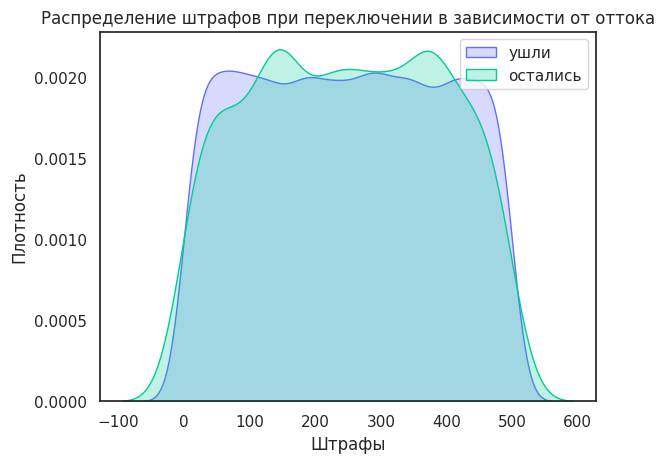

In [78]:
ax = sns.kdeplot(churn.penaltytoswitch[(churn["churn"] == 0) ],
                color='#636EFB', fill=True)
ax = sns.kdeplot(churn.penaltytoswitch[(churn["churn"] == 1) ],
                ax =ax, color='#00CC96', fill=True)
ax.legend(["ушли","остались"],loc='upper right')
ax.set_ylabel('Плотность')
ax.set_xlabel('Штрафы')
ax.set_title('Распределение штрафов при переключении в зависимости от оттока')

## 4) Строим модели!

### 1. Logistic Regression

In [80]:
# Данные после горячего кодирования
y = churn_dummies['churn'].values
X = churn_dummies.drop(columns = ['churn'])

# Масштабирование от 0 до 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [82]:
# Создаю Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
model = LogisticRegression(solver='lbfgs', max_iter=50 )
result = model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [128]:
prediction_test = model.predict(X_test)

# Prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9091353199804592


In [129]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

Признаков переобучения нет.

AxesSubplot(0.125,0.11;0.775x0.77)


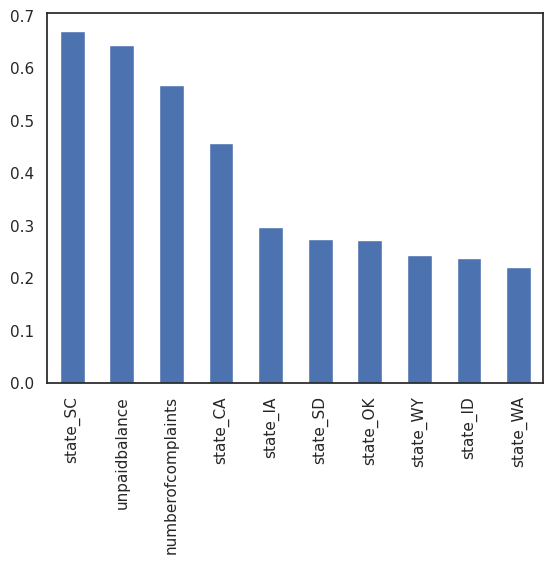

In [92]:
# Получения весов всех переменных
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


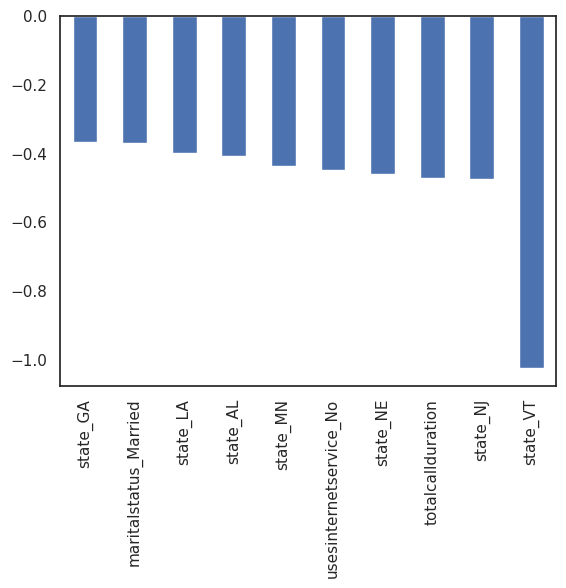

In [93]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Небольшие выводы из полученных данных:

Мы видим, что некоторые переменные имеют отрицательную связь с прогнозируемой переменной (сhurn), а некоторые - положительную. Отрицательная связь означает, что вероятность оттока уменьшается с ростом этой переменной. Давайте подытожим некоторые интересные особенности ниже:

- высокий неоплаченный баланс, увеличение количества жалоб ведет к отказу от услуги. И это в целом логично. Вероятнее всего пользователи не удовлетворены услугами, либо не имеют средств их оплатить.

- Исходя из предоставленных данных штаты SC, CA, IA, SD, OK, WY, ID, WA - чаще остальных отказываются от услуг. Несмотря на это штат ID чаще приносит больше всего дохода. Также штаты IA, OK -- вошли в топ-20 штатов с большой прибылью. Возможно там большое количество пользователей, от этого большое количество отказов. Данное предположение необходимо исследовать. 

- Исходя из предоставленных данных штаты GA, AL, LA, MN, NE, NJ, VT -- меньше остальных отказываются от услуг. GA, AL, NE -- вошли в топ-20 самых прибыльных штатов.

- Если пользователь женат(замужем), то вероятность оттока снижается. Также вероятность оттока снижается если у пользователя большая длительность звонков или он не использует интернет.

### 2. Tree

In [98]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train,y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9092463661903017, 0.9084025403028823)

Признаков переобучения не вижу.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



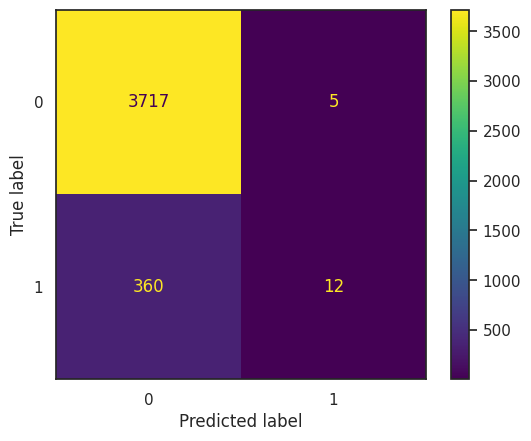

In [120]:
tree_pred = tree.predict(X_test)
plot_confusion_matrix(tree, X_test, y_test, display_labels = [0, 1])

Нарисуем дерево:

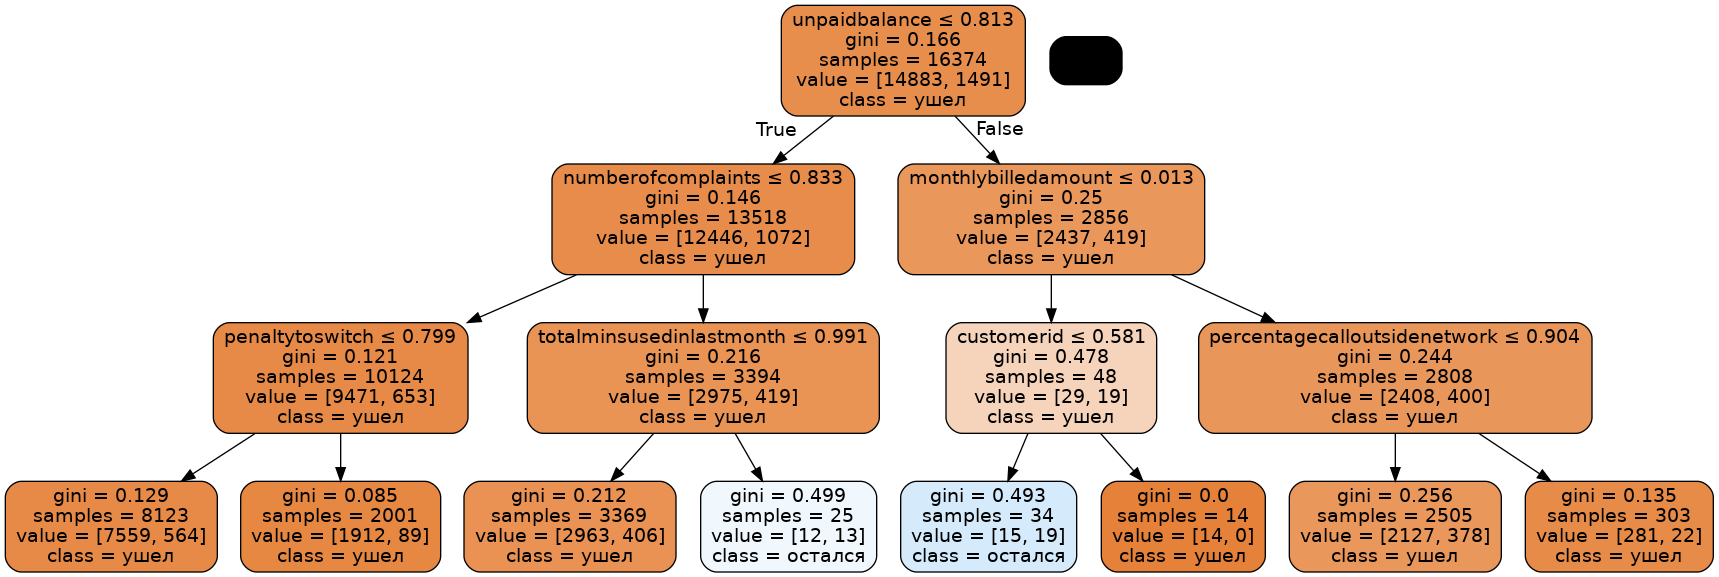

In [108]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=["ушел", "остался"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Например, если у пользователя unpaidbalance = 0.7, numbercomplaints = 0.9, totalminsusedinlastmonth = 0.1 то он уйдет.

### 3. Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

1 способ:

In [140]:
def search_param(model, param, X_train, y_train, X_test, y_test, area=range(1, 11), msg=True, plot=True, seed=None):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#    точность    время')
    for abc in area:
        start = time.time()
        rfc = eval(model + '(' + param + '=' + str(abc) + ', random_state=' + str(seed) + ')')
        rfc.fit(X_train, y_train)
        s = rfc.score(X_test, y_test)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%-3d %10f  %7f" % (abc, s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

#    точность    время
1     0.891060  0.166126
2     0.925256  0.265848
3     0.932829  0.428113
4     0.924768  0.511917
5     0.939179  0.598733
6     0.932584  0.732264
7     0.937225  0.827682
8     0.932340  0.949366
9     0.939668  0.874298
10    0.934538  1.161459
11    0.941622  1.308204
12    0.937225  1.414706
13    0.943332  1.576173
14    0.935027  1.590644
15    0.941378  1.736455
16    0.934783  1.673280
17    0.939912  1.914989
18    0.933317  1.882231
19    0.939179  1.903444
20    0.936004  2.223321
21    0.939912  2.291487
22    0.937225  2.313771
23    0.941622  2.368066
24    0.937714  2.676840
25    0.940889  2.607325
26    0.939179  2.697117
27    0.941133  3.048408
28    0.937714  3.019372
29    0.941622  3.100013
30    0.939179  2.994316
31    0.942599  3.388089
32    0.938935  3.406000
33    0.943087  3.353547
34    0.940401  3.966099
35    0.943332  3.555630
36    0.939179  4.128516
37    0.942599  3.964362
38    0.941378  4.027274
39    0.943576  4.232215
40

49

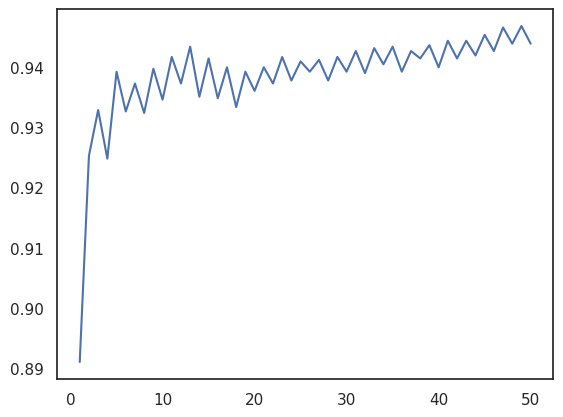

In [141]:
# поиск n_estimators -- количество деревьев в лесу

search_param('RandomForestClassifier', 'n_estimators', X_train, y_train, X_test, y_test, area=range(1, 51), seed= 15 )

#    точность    время
1     0.909135  1.326158
2     0.909135  1.852158
3     0.909135  2.405225
4     0.909135  2.719586
5     0.909135  3.311056
6     0.909135  3.878865
7     0.909135  4.410071
8     0.909135  4.786283
9     0.909135  5.396725
10    0.909135  5.836900
11    0.909135  6.361223
12    0.909135  7.162047
13    0.909624  7.154166
14    0.909868  7.925536
15    0.909868  8.129574
16    0.911578  8.156682
17    0.912311  9.091200
18    0.914021  8.805379
19    0.914998  9.685809
20    0.916952  9.418343
21    0.922570  9.703896
22    0.925256  9.883665
23    0.926478  10.087228
24    0.931119  9.772124


24

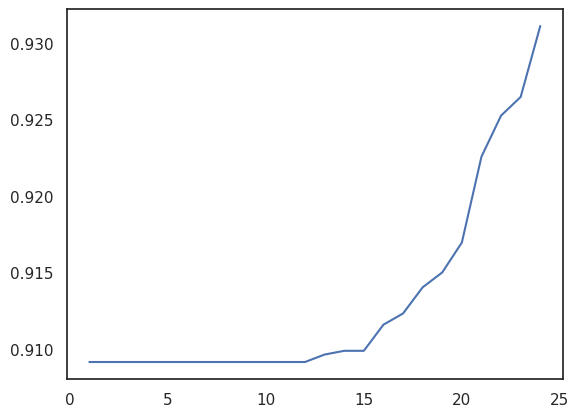

In [142]:
# поиск max_depth -- максимальной глубины
search_param('RandomForestClassifier', 'max_depth', X_train, y_train, X_test, y_test, range(1, 25), seed=15)

#    точность    время
2     0.943576  11.235557
3     0.935271  11.114244
4     0.926478  10.862893
5     0.922325  10.393728
6     0.919150  10.523697
7     0.914998  10.728179
8     0.915242  11.091054
9     0.913288  10.851002


2

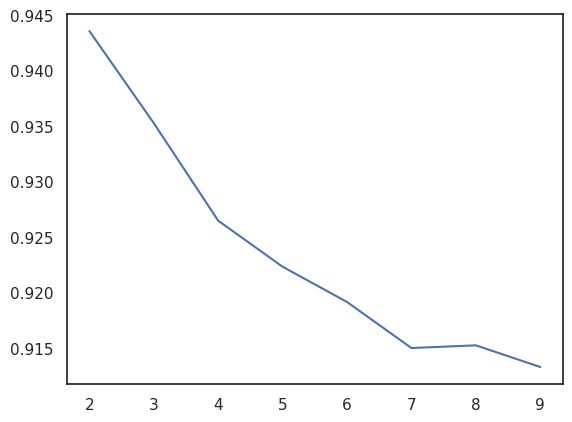

In [143]:
# поиск min_samples_split -- минимальное кол-во выборок, необходимых для разделения 
search_param('RandomForestClassifier', 'min_samples_split', X_train, y_train, X_test, y_test, range(2, 10), seed=15)

#    точность    время
1     0.943576  10.787763
2     0.914509  10.563513
3     0.910357  10.201414
4     0.909135  10.431373
5     0.909135  9.400041
6     0.909135  9.330292
7     0.909135  8.968007
8     0.909135  8.983164
9     0.909135  9.087968


1

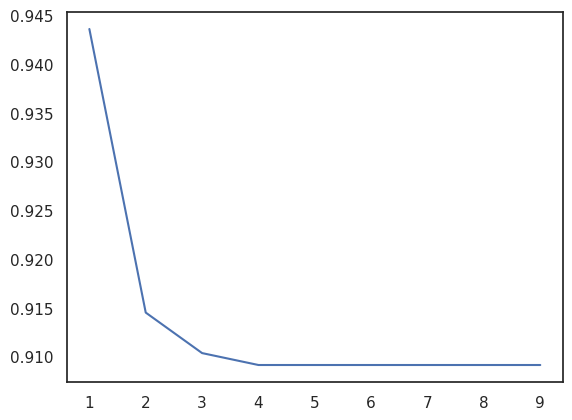

In [144]:
# поиск min_samples_leaf -- минимальное кол-во примеров, требуемое для нахождения в листовом узле
search_param('RandomForestClassifier', 'min_samples_leaf', X_train, y_train, X_test, y_test, range(1, 10), seed=15)

Кросс-валидация: Использую перекрестную проверку, чтобы выявить наилучшие параметры. 

In [147]:
randFCl = RandomForestClassifier(random_state=15)
param = {'n_estimators': [i for i in range(38, 51)], 'max_depth': [i for i in range(20, 25)]}
gscv =  GridSearchCV(randFCl, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 65 candidates, totalling 195 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49, 50]},
             verbose=1)

In [148]:
gscv.best_params_

{'max_depth': 24, 'n_estimators': 44}

Создаём модель по полученным данным:

<AxesSubplot: >

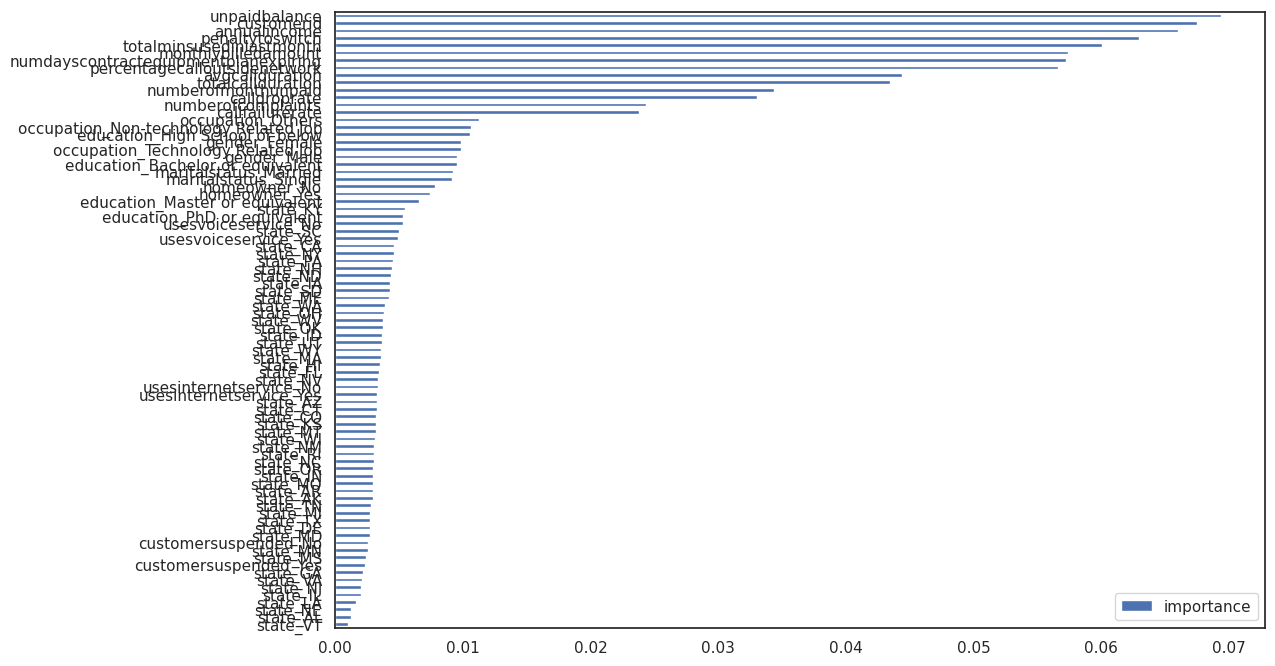

In [149]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Здесь есть важные переменные для предсказания и они размещены по вертикали. Самые важные -- наверху.

In [150]:
print(best_c.score(X_train, y_train), best_c.score(X_test, y_test))

0.9943202638329058 0.929408891060088


Интересно то, что качество здесь хорошее, но я считаю, что есть небольшие признаки переобучения.

2 способ:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto', max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=50)

In [110]:
model_rf.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

Тоже хорошо, признаков также не вижу. На тестовой даже чуть-чуть лучше.

Как и ожидалось вторым способом качество будет хуже. Из двух RF выбираю первую.

### 4. Support Vecor Machine (SVM)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [130]:
model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [131]:
model_svm.score(X_train, y_train), model_svm.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

In [132]:
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9091353199804592

Тоже всё хорошо.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



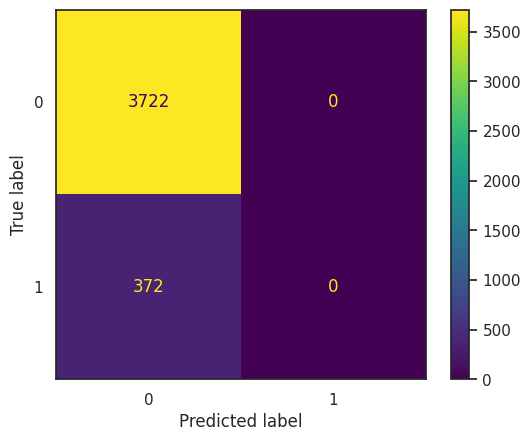

In [133]:
plot_confusion_matrix(model_svm, X_test, y_test, display_labels = [0, 1])

### 5. ADA Boost

In [134]:
modelADA = AdaBoostClassifier()

modelADA.fit(X_train,y_train)

AdaBoostClassifier()

In [137]:
print (modelADA.score(X_train, y_train), modelADA.score(X_test, y_test))

0.9086967143031636 0.9088910600879335


Признаков переобучения не вижу.

### 6. XG Boost

In [139]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

print (modelXGB.score(X_train, y_train), modelXGB.score(X_test, y_test))

0.9857090509344082 0.9386907669760626


Вот здесь есть понижение качества модели, но я считаю это не сильно критично. Тем более качество на этой модели всё очень высокое.

### 7. Ансабль

VOTING

In [154]:
modelVote = VotingClassifier(estimators=[('lr', model), ('tr', tree), ('rf1', best_c), ('rf2', model_rf), ('svm', model_svm), ('ada', modelADA), ('xgb', modelXGB)], voting='hard')
modelVote.fit(X_train,y_train)

train_mv = modelVote.score(X_train,y_train)
test_mv = modelVote.score(X_test,y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [157]:
print('на тренировочном массиве модель работает с точностью {0}, \
а на тестовом массиве с точностью {1:6.2f}'.format \
(train_mv, test_mv) )

на тренировочном массиве модель работает с точностью 0.9089410040307805, а на тестовом массиве с точностью   0.91


## Вывод по всем

- Accuracy: 0.91 (+/- 0.00) [LR]

- Accuracy: 0.91 (+/- 0.00) [Tree]

- Accuracy: 0.92 (+/- 0.00) [RF 1 способ]

- Accuracy: 0.91 (+/- 0.00) [RF 2 способ]

- Accuracy: 0.91 (+/- 0.00) [SVM]

- Accuracy: 0.91 (+/- 0.00) [ADABoost]

- Accuracy: 0.91 (+/- 0.00) [XGBoost]

- Accuracy: 0.91 (+/- 0.00) [Voting]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c2d4a28-4ba0-4474-94ac-254dc4ba316c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>